In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [109]:
df = pd.read_csv("dvip_gp_cos.csv")
df

,dataset_name,vip_layers,regression_coeffs,batch_size,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,boston,[1],100,1000,0,231.916931,2.669817,2.415500,1.440482,153.066833,3.865234,2.768672,1.959184
1,boston,[1],100,1000,1,206.832489,2.473129,2.340099,1.367017,216.525513,5.531804,3.593938,2.375258
2,boston,[1],100,1000,10,245.623535,2.765475,2.452323,1.495640,132.038788,2.855598,2.441307,1.502206
3,boston,[1],100,1000,11,250.856689,2.699737,2.427815,1.467802,140.406921,3.071503,2.515439,1.676740
4,boston,[1],100,1000,12,248.398895,2.712713,2.430938,1.461059,141.413284,3.145389,2.545786,1.783675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,winered,[5],200,1000,2,173.827209,0.016101,-1.833164,0.016088,50276.457031,1.157688,123.563354,0.676097
1029,winered,[5],200,1000,3,446.794708,0.016313,-1.767589,0.017094,28481.558594,0.898466,58.694714,0.524224
1030,winered,[5],200,1000,4,647.481750,0.018195,-1.695941,0.018424,28218.765625,0.959744,64.167610,0.549390
1031,winered,[5],200,1000,5,681.013062,0.021692,-1.618661,0.020066,26379.158203,1.011608,58.779385,0.603945


Group table by their common parameters and compute mean and std over split

In [110]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name","regression_coeffs", "vip_layers"]).agg(["mean", std])
full_df


batch_size          split            \
                                                mean std       mean       std   
dataset_name regression_coeffs vip_layers                                       
boston       100               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   9.500000  1.289380   
                               [3]              1000   0   9.500000  1.289380   
                               [4]              1000   0   9.500000  1.289380   
                               [5]              1000   0   9.500000  1.289380   
             200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.500000  1.289380   
                               [4]             10000   0   9.500000  1.289380   
                               [5]             10000   0   9.500000  1.289380   
concrete     100               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   9.500000  1.289380   
                               [3]              1000   0   9.500000  1.289380   
                               [4]              1000   0   9.500000  1.289380   
                               [5]              1000   0   9.500000  1.289380   
             200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.210526  1.324349   
                               [4]             10000   0   9.263158  1.335312   
                               [5]             10000   0   9.500000  1.289380   
energy       100               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   9.500000  1.289380   
                               [3]              1000   0   9.500000  1.289380   
                               [4]              1000   0   9.500000  1.289380   
                               [5]              1000   0   9.500000  1.289380   
             200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.500000  1.289380   
                               [4]             10000   0   9.500000  1.289380   
                               [5]             10000   0   9.500000  1.289380   
kin8nm       200               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   9.500000  1.289380   
                               [3]              1000   0   9.500000  1.289380   
                               [4]              1000   0  16.000000  0.632456   
naval        100               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   8.600000  1.507905   
             200               [1]              1000   0   7.384615  1.437200   
                               [2]              1000   0  12.000000  0.000000   
power        100               [1]              1000   0   9.421053  1.354823   
                               [2]              1000   0   9.500000  1.289380   
             200               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   8.666667  1.495673   
                               [3]              1000   0   7.384615  1.437200   
                               [4]              1000   0  11.230769  1.310648   
                               [5]              1000   0   8.538462  1.838495   
protein      100               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   5.000000  0.00

In [111]:
df.query("dataset_name == 'boston' and regression_coeffs == 200 and vip_layers == '[1]'")

,dataset_name,vip_layers,regression_coeffs,batch_size,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
20,boston,[1],200,10000,0,221.860916,2.491391,2.358966,1.350391,167.066315,3.827276,2.733708,1.958143
21,boston,[1],200,10000,1,196.872223,2.365605,2.305105,1.311118,224.683151,5.519206,3.544067,2.322030
22,boston,[1],200,10000,10,229.644180,2.530861,2.379615,1.379048,156.923340,3.367287,2.526764,1.672626
23,boston,[1],200,10000,11,240.335541,2.499907,2.365772,1.371914,154.296753,3.012595,2.523730,1.682102
24,boston,[1],200,10000,12,240.028839,2.561055,2.385827,1.390898,146.688965,2.856851,2.481285,1.625628
25,boston,[1],200,10000,13,237.282715,2.538893,2.378750,1.391753,150.235565,2.953380,2.502029,1.663806
26,boston,[1],200,10000,14,223.330917,2.534730,2.376634,1.371777,163.064529,3.898607,2.707084,2.017904
27,boston,[1],200,10000,15,232.833618,2.526802,2.374338,1.382230,152.037979,3.087990,2.537521,1.717323
28,boston,[1],200,10000,16,216.484924,2.510768,2.366479,1.365521,177.777054,4.347230,2.757931,2.213894
29,boston,[1],200,10000,17,230.944977,2.556476,2.380211,1.386976,154.527313,3.639471,2.677256,1.829555


# Comparative with other models

In [112]:
vip = full_df.query("regression_coeffs == 200")
#vip =  full_df.query("prior_kl == True and bnn_structure == '[10]'")
vip


batch_size          split            \
                                                mean std       mean       std   
dataset_name regression_coeffs vip_layers                                       
boston       200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.500000  1.289380   
                               [4]             10000   0   9.500000  1.289380   
                               [5]             10000   0   9.500000  1.289380   
concrete     200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.210526  1.324349   
                               [4]             10000   0   9.263158  1.335312   
                               [5]             10000   0   9.500000  1.289380   
energy       200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0   9.500000  1.289380   
                               [4]             10000   0   9.500000  1.289380   
                               [5]             10000   0   9.500000  1.289380   
kin8nm       200               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   9.500000  1.289380   
                               [3]              1000   0   9.500000  1.289380   
                               [4]              1000   0  16.000000  0.632456   
naval        200               [1]              1000   0   7.384615  1.437200   
                               [2]              1000   0  12.000000  0.000000   
power        200               [1]              1000   0   9.500000  1.289380   
                               [2]              1000   0   8.666667  1.495673   
                               [3]              1000   0   7.384615  1.437200   
                               [4]              1000   0  11.230769  1.310648   
                               [5]              1000   0   8.538462  1.838495   
protein      200               [1]              1000   0   9.500000  1.289380   
winered      200               [1]             10000   0   9.500000  1.289380   
                               [2]             10000   0   9.500000  1.289380   
                               [3]             10000   0  11.833333  1.342848   
                               [4]             10000   0   6.833333  2.126769   
                               [5]              1000   0   6.888889  1.780862   

                                            LOSS_train             RMSE_train  \
                                                  mean         std       mean   
dataset_name regression_coeffs vip_layers                                       
boston       200               [1]          228.291591    2.681106   2.518090   
                               [2]          231.035999    2.685583   2.450643   
                               [3]          233.348062    2.672876   2.545445   
                               [4]          264.291986    8.202768   2.638642   
                               [5]         -115.707553    8.904384   0.286919   
concrete     200               [1]          518.172339    2.325278   4.998566   
                               [2]          580.760104    2.717675   4.739910   
                               [3]          185.117206    7.199816   2.766657   
                               [4]          176.763715    8.502997   2.530260   
                               [5]          285.788827    4.939949   2.524508   
energy       200               [1]         -421.251643    2.818134   0.557878   
                               [2]         -405.200482    2.308673   0.3

In [113]:
doubly = pd.read_csv("doubly.csv")

In [114]:
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

NLL                RMSE                CRPS          
                     mean       std      mean       std      mean       std
dataset  layers                                                            
boston   1       2.621324  0.061539  3.461930  0.172243  1.778254  0.054756
         2       2.619427  0.060715  3.464310  0.174090  1.775397  0.055053
         3       2.618580  0.057986  3.477714  0.176407  1.780114  0.056023
         4       2.612612  0.056778  3.459250  0.180476  1.768086  0.057338
         5       2.619665  0.058376  3.483772  0.184585  1.778915  0.059403
concrete 1       3.134538  0.016871  5.699006  0.128251  3.104325  0.057626
         2       3.137992  0.016458  5.709117  0.127669  3.113382  0.057095
         3       3.142599  0.016832  5.724927  0.129163  3.125693  0.058891
         4       3.134859  0.017792  5.658314  0.130668  3.083788  0.057433
         5       3.092611  0.015842  5.374571  0.115534  2.942421  0.051177
energy   1       1.141213  0.016797  0.713296  0.020260  0.414601  0.009610
         2       0.661802  0.019321  0.451084  0.012712  0.252025  0.005593
         3       0.711009  0.021007  0.462688  0.013160  0.262231  0.005888
         4       0.759983  0.021207  0.478973  0.014059  0.273281  0.006523
         5       0.700959  0.021684  0.458096  0.015404  0.259230  0.007059
kin8nm   1      -0.975375  0.003277  0.086898  0.000536  0.049229  0.000258
         2      -1.350378  0.004308  0.062584  0.000347  0.035030  0.000162
         3      -1.382660  0.006671  0.060735  0.000458  0.033985  0.000235
naval    1      -6.475724  0.117892  0.000285  0.000035  0.000185  0.000020
         2      -6.894672  0.101289  0.000152  0.000036  0.000119  0.000017
         3      -7.039468  0.049660  0.000085  0.000012  0.000091  0.000006
         4      -6.959729  0.055067  0.000109  0.000016  0.000102  0.000007
         5      -6.873125  0.072354  0.000159  0.000025  0.000120  0.000010
power    1       2.806324  0.009995  3.993163  0.040720  2.173505  0.011311
         2       2.770222  0.009873  3.850422  0.038183  2.075122  0.009159
         3       2.747370  0.012654  3.760601  0.049078  2.023911  0.015586
         4       2.732378  0.011725  3.702821  0.045233  1.984471  0.012649
         5       2.735273  0.010918  3.712386  0.041823  1.991525  0.009105
protein  1       2.907479  0.002265  4.428554  0.011083  2.481267  0.005884
         2       2.786240  0.002311  3.936413  0.010322  2.161253  0.004967
         3       2.715014  0.002847  3.708458  0.011970  2.002001  0.005932
         4       2.689973  0.002877  3.641484  0.011498  1.950791  0.005703
         5       2.692614  0.004289  3.663181  0.016545  1.957200  0.008180
wine_red 1       0.928739  0.012829  0.614669  0.008504  0.340628  0.004178
         2       0.928976  0.012711  0.614753  0.008461  0.340674  0.004151
         3       0.929331  0.012509  0.615001  0.008325  0.340852  0.004091
         4       0.929474  0.012561  0.614968  0.008397  0.340988  0.004120
         5       0.929893  0.012395  0.615139  0.008317  0.341113  0.004076

In [115]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    far[0] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    #vip100_query = vip100.query("dataset_name == @dataset").xs((metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()
    
    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {"VIP": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          #"VIP 100": item(vip100_query.query("vip_layers == '[1]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_100.pdf")
        

In [116]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = ["VIP", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5", "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {"VIP": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          #"VIP 100": "darkblue", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

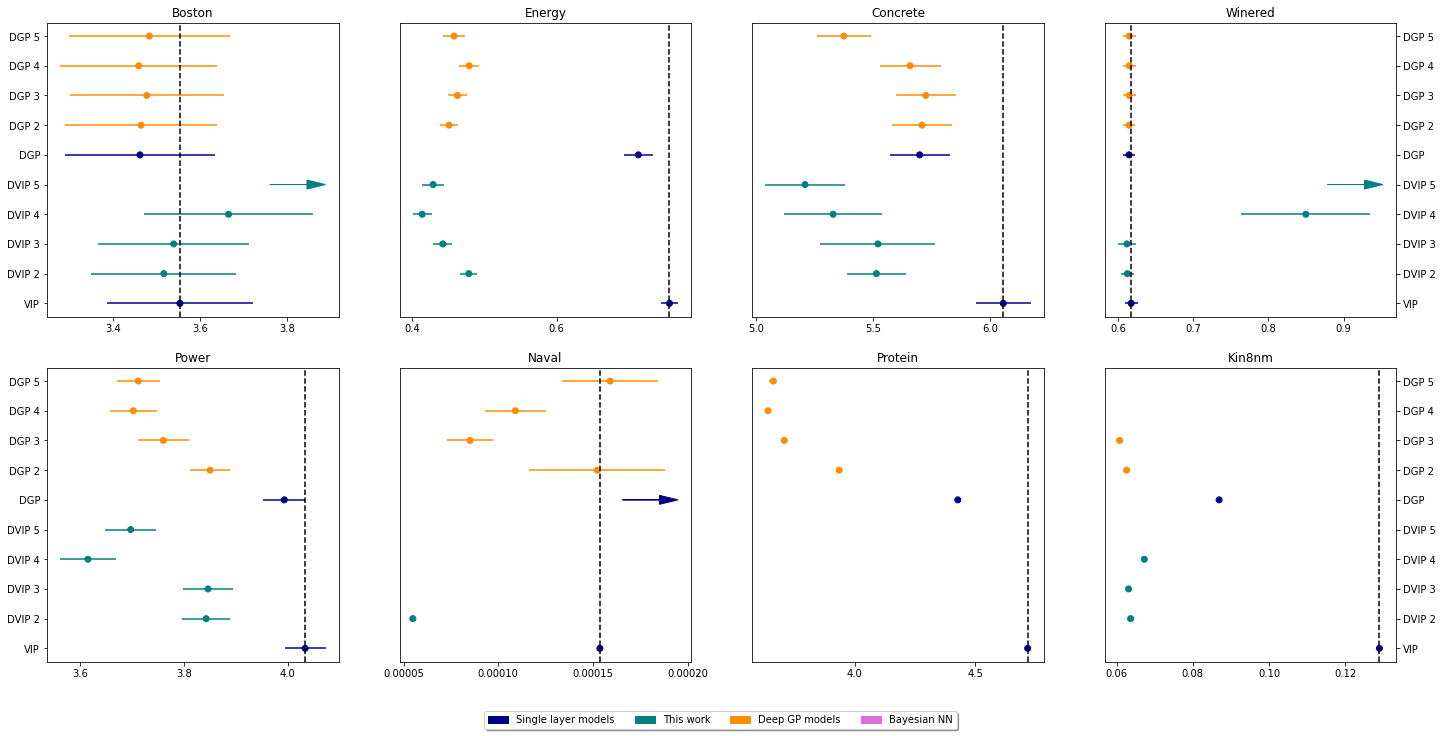

In [117]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

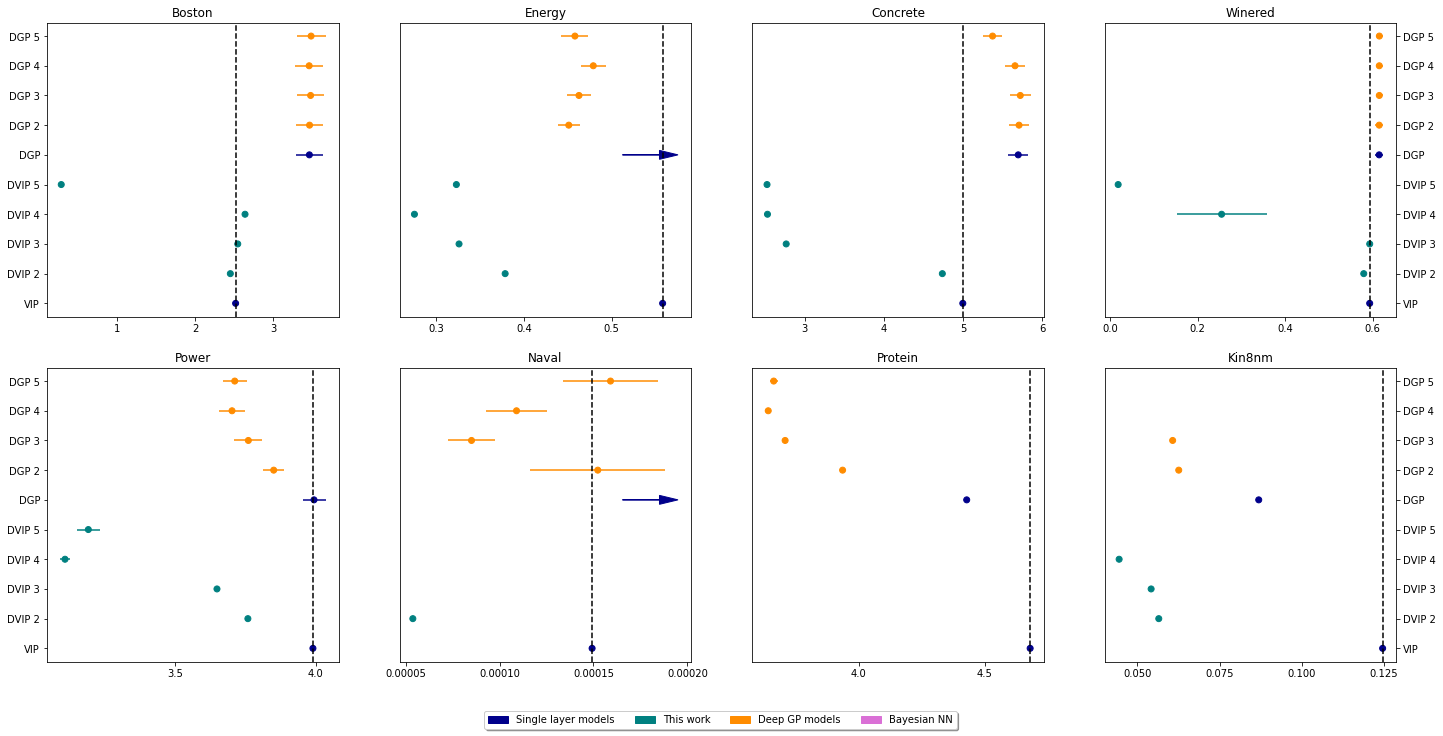

In [118]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

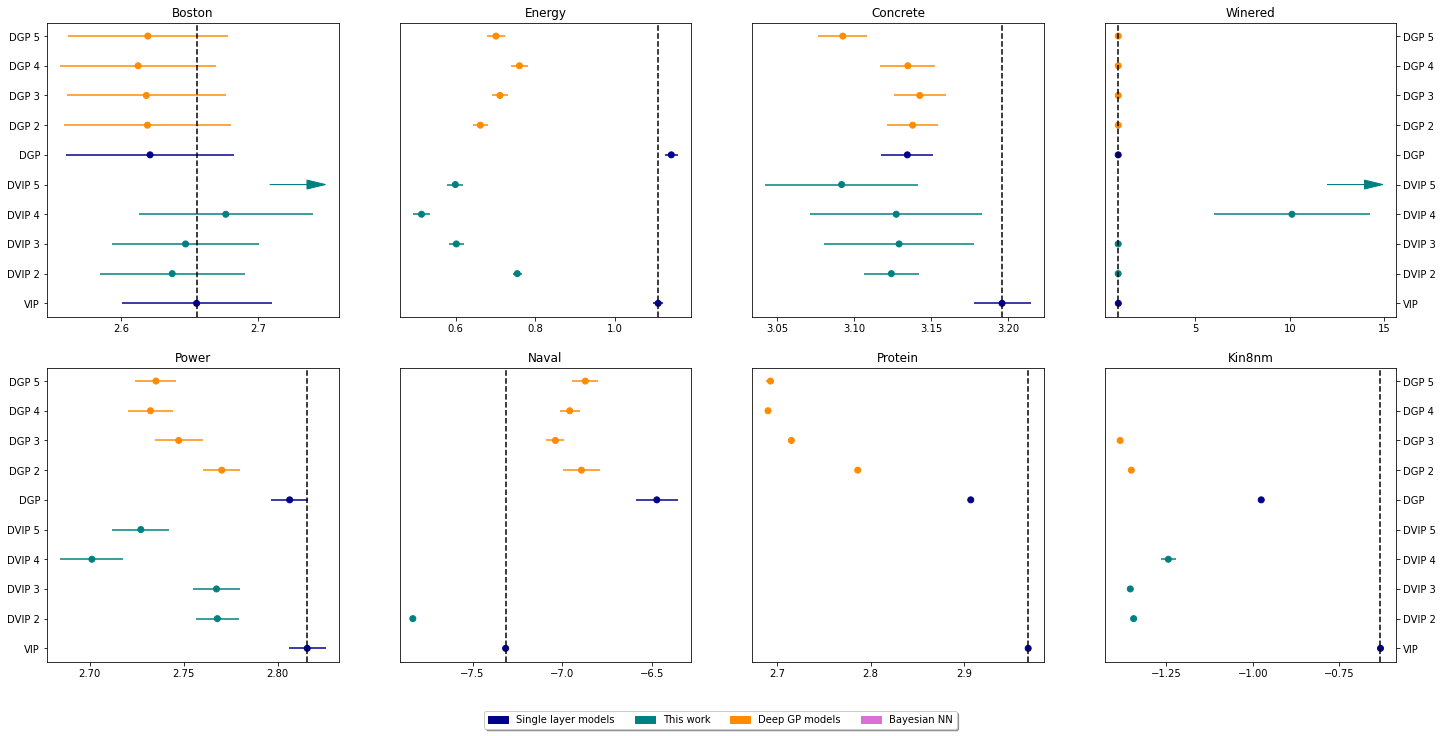

In [119]:
plot_datasets(dataset_names, model_names, colors, "NLL")

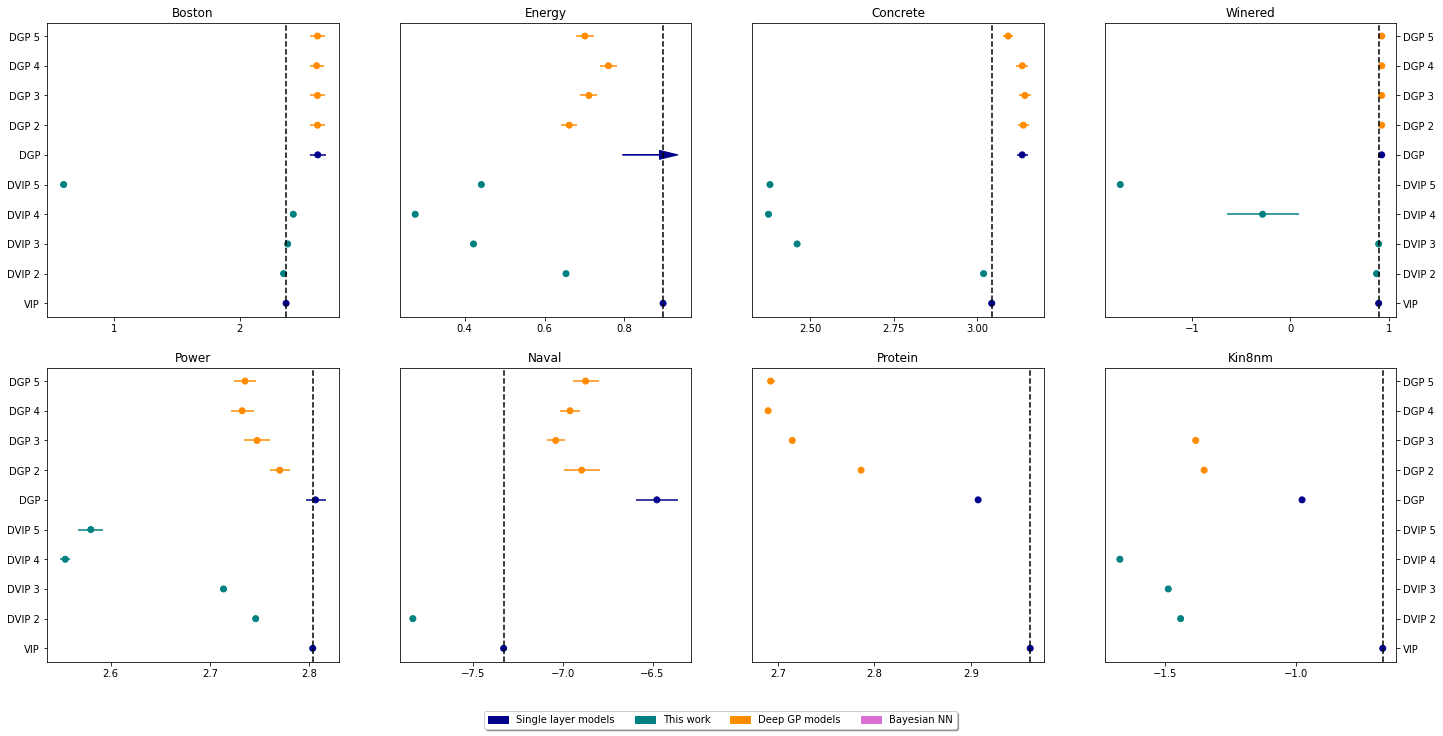

In [120]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

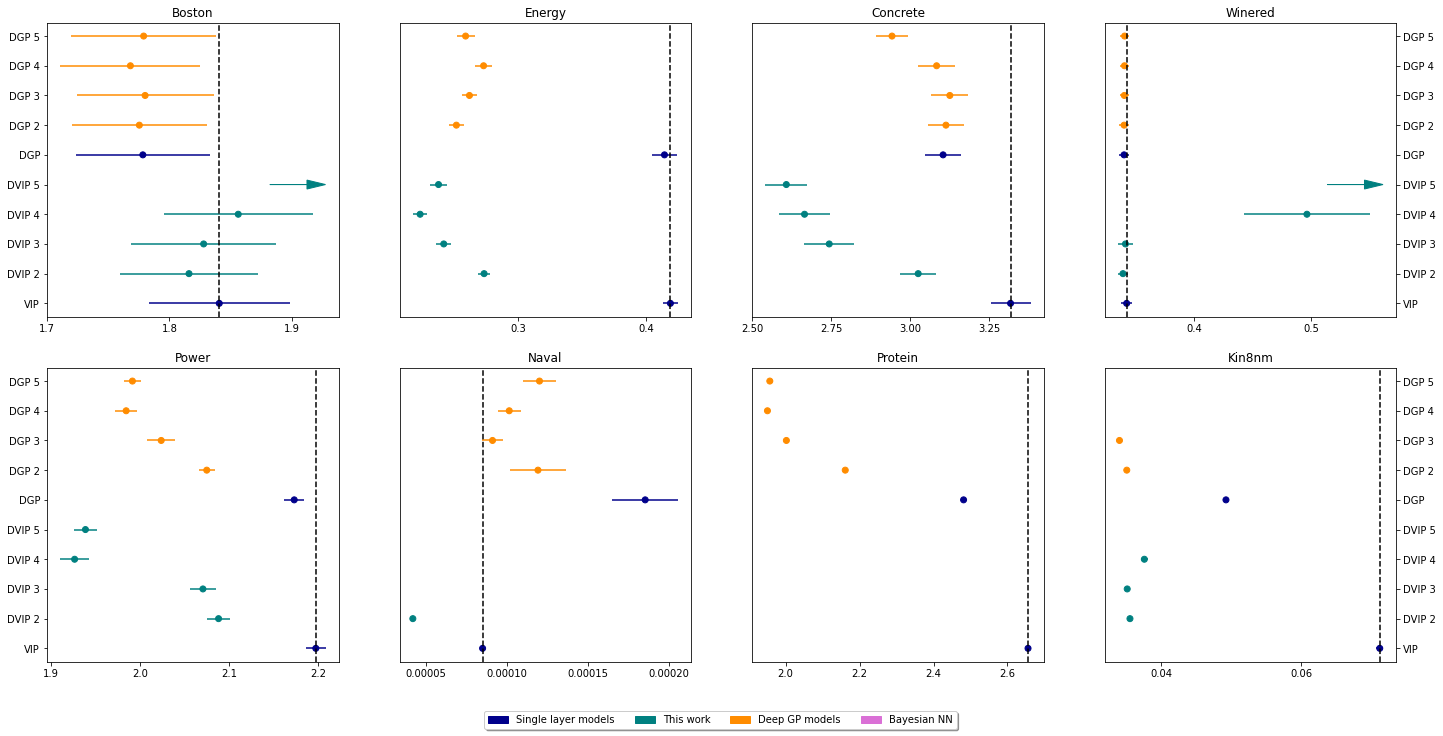

In [121]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

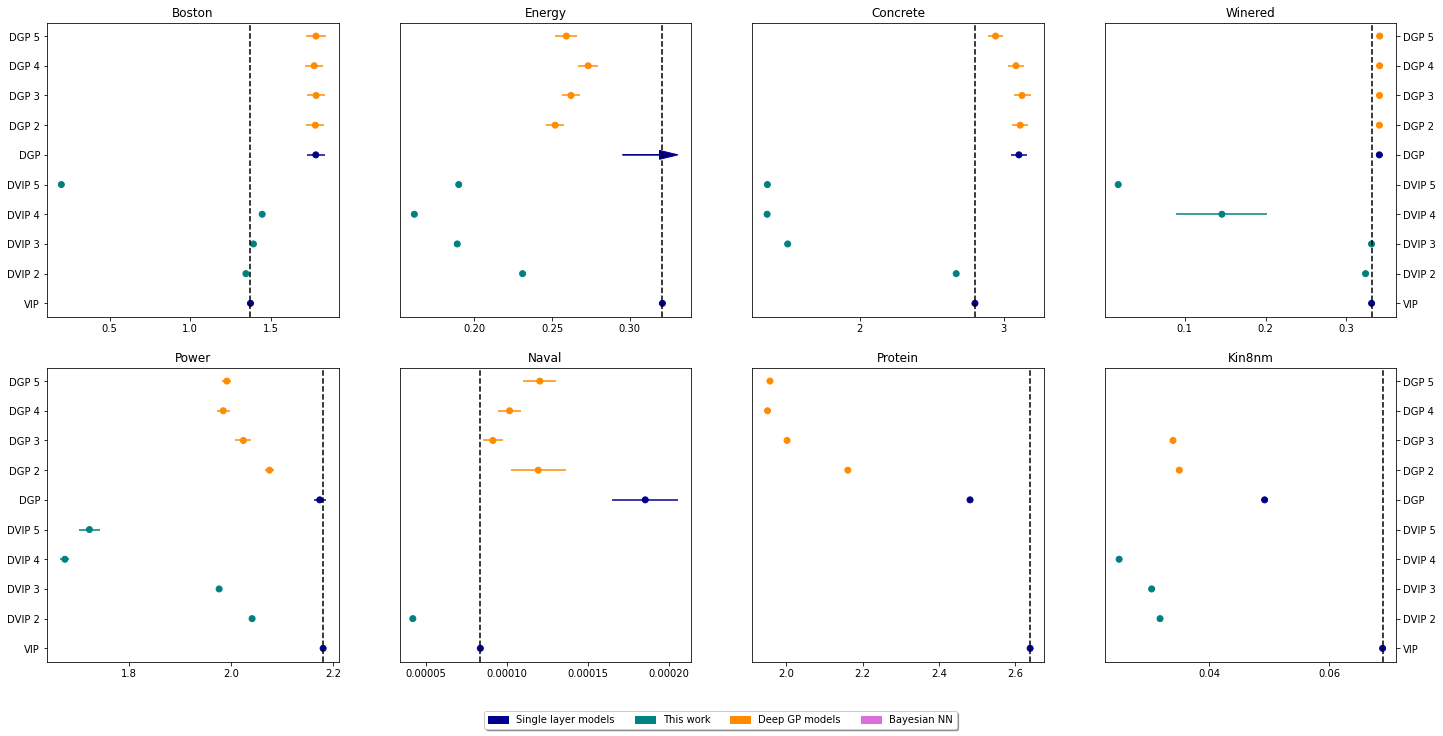

In [122]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)